In [1]:
# NewsMood
# Create a Python script to perform a sentiment analysis of the Twitter activity
# of various news oulets, and to present your findings visually.

# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime, timezone
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Users: 
target_users = ["Fox", "BBC", "CBS", "CNN", "NYTimes"]

In [4]:
#* Pull into a DataFrame the tweet's source acount, its text, its date, and its
#  compound, positive, neutral, and negative sentiment scores.
all = pd.DataFrame()
tweets_per_user = 100  # 100 tweets from each user

for user in target_users:
    n = 0
    public_tweets = api.user_timeline(user, count = tweets_per_user)
    for tweet in public_tweets[:100]:
        results = analyzer.polarity_scores(tweet["text"])
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        comp = results['compound']
        diff = int((datetime.strptime(tweet["created_at"], '%a %b %d %H:%M:%S %z %Y')-datetime.now(timezone.utc)).total_seconds())
        all = all.append([{"positive": pos,
                           "neutral": neu,
                           "negative": neg,
                           "compound": comp,
                           "user":user,
                           "datetime":tweet["created_at"],
                           "sec ago": diff,
                           "number": n,
                           "text": tweet['text']
                          }])
        n = n + 1
    
all


,compound,datetime,negative,neutral,number,positive,sec ago,text,user
0,0.7177,Fri Apr 06 09:47:15 +0000 2018,0.000,0.572,0,0.428,-39622,"@pmarsceill ahh, interesting! Might apply for ...",Fox
0,0.0000,Fri Apr 06 07:48:45 +0000 2018,0.000,1.000,1,0.000,-46732,@johnbarton 🥂,Fox
0,0.4576,Fri Apr 06 04:35:57 +0000 2018,0.000,0.857,2,0.143,-58300,RT @aprilwensel: “I absolutely support women i...,Fox
0,0.0000,Fri Apr 06 04:33:31 +0000 2018,0.151,0.735,3,0.114,-58446,RT @ProjectBuddy: Mental illness can make it h...,Fox
0,0.5859,Fri Apr 06 04:32:32 +0000 2018,0.000,0.789,4,0.211,-58505,"This is an excellent read, especially for fell...",Fox
0,-0.2960,Fri Apr 06 02:44:29 +0000 2018,0.084,0.916,5,0.000,-64988,RT @amyngyn: last: @cindyalvarez on 5 things t...,Fox
0,0.5994,Fri Apr 06 01:28:52 +0000 2018,0.000,0.731,6,0.269,-69525,Number of times I get asked for free diversity...,Fox
0,0.2975,Fri Apr 06 00:13:56 +0000 2018,0.074,0.795,7,0.131,-74021,@adblanche 🙏🏻 agree!\n\nEspecially when lookin...,Fox
0,0.5093,Fri Apr 06 00:12:26 +0000 2018,0.000,0.708,8,0.292,-74111,"@hfauq Hah, I’m already chatting to folks ther...",Fox
0,0.5423,Thu Apr 05 07:56:22 +0000 2018,0.000,0.791,9,0.209,-132675,RT @AngryBlackLady: Please read and share this...,Fox


In [5]:
#* Export the data in the DataFrame into a CSV file.
all.to_csv("SentimentAnalysis", sep='\t', encoding='utf-8')


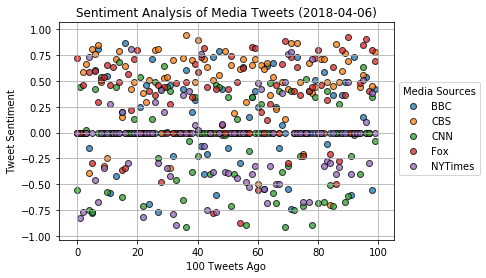

In [6]:
# The first plot will be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization,
# Each plot point will reflect the _compound_ sentiment of a tweet.

now = datetime.now().strftime("%Y-%m-%d")

all_grouped = all.groupby('user')
for user, group in all_grouped:
    plt.scatter(
        group['number'],
        group['compound'],
        edgecolors='black',
        label=user,
        alpha=0.75)

plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.ylabel("Tweet Sentiment")
plt.xlabel("100 Tweets Ago")
plt.legend(bbox_to_anchor=[1, 0.75], title="Media Sources", fancybox=True)
plt.grid(True)
plt.show()
plt.savefig("SentimentAnalysis_Tweets.png")

In [7]:
#The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization.

all_compound = pd.DataFrame({
    "compound":all_grouped['compound'].mean()
    })
all_compound

,compound
user,
BBC,0.080737
CBS,0.358259
CNN,-0.073318
Fox,0.287083
NYTimes,-0.079182


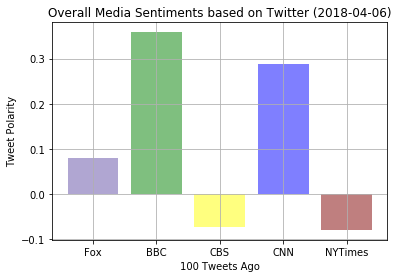

In [8]:
x_axis = np.arange(len(target_users))
y_axis = all_compound["compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, target_users)
plt.title(f"Overall Media Sentiments based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("100 Tweets Ago")
plt.grid(True)
plt.bar(x_axis, all_compound["compound"], color=['#624ea7','g','yellow','blue','maroon'], alpha=0.5, align='edge')
plt.show()
plt.savefig("OverallSentiment_Tweets.png")     